# Nim : 231351011
# Nama : Ahmad Rizki Sabani
# Kelas : Pagi A

## Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('Diabetes1.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                20 non-null     int64  
 1   BMI                20 non-null     float64
 2   Blood_Sugar_Level  20 non-null     int64  
 3   Family_History     20 non-null     object 
 4   Diet               20 non-null     object 
 5   Diabetes           20 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


## EDA

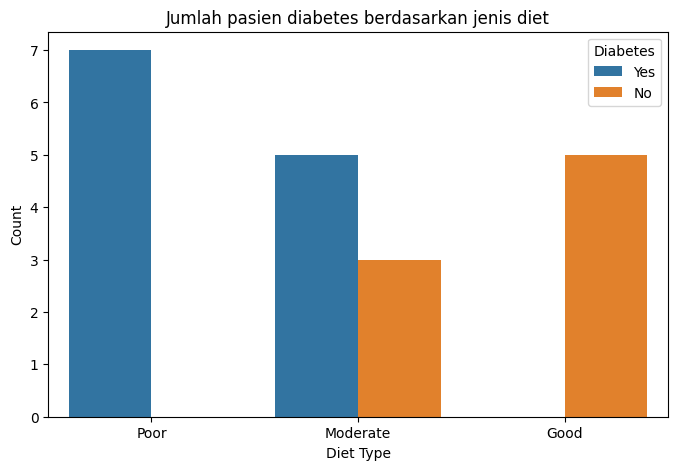

In [3]:
plt.figure(figsize=(8,5))
sns.countplot(x='Diet', hue="Diabetes", data=df)
plt.title("Jumlah pasien diabetes berdasarkan jenis diet")
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.legend(title="Diabetes")
plt.show()

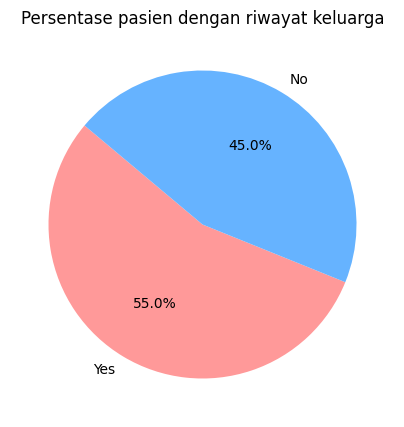

In [4]:
family_history_counts = df['Family_History'].value_counts()
plt.figure(figsize=(5,5))
family_history_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Persentase pasien dengan riwayat keluarga')
plt.ylabel("")
plt.show()

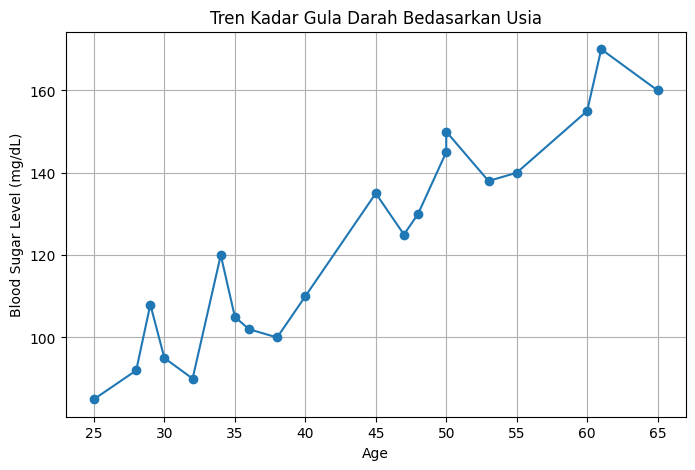

In [5]:
df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8,5))
plt.plot(df_sorted['Age'], df_sorted['Blood_Sugar_Level'], marker='o')
plt.title("Tren Kadar Gula Darah Bedasarkan Usia")
plt.xlabel('Age')
plt.ylabel("Blood Sugar Level (mg/dL)")
plt.grid(True)
plt.show()

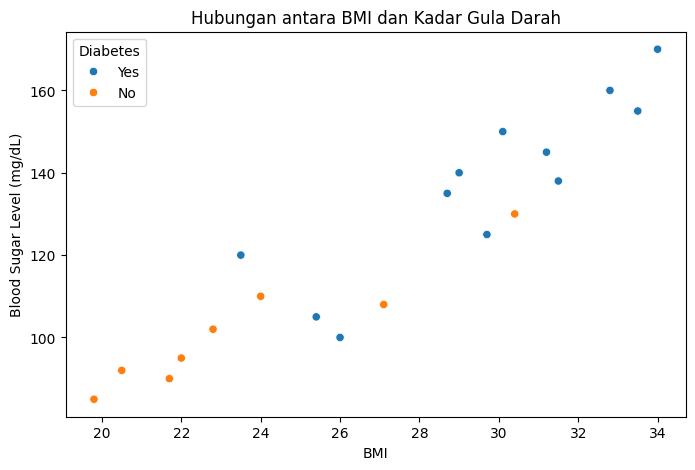

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI', y='Blood_Sugar_Level', hue="Diabetes", data=df)
plt.title("Hubungan antara BMI dan Kadar Gula Darah")
plt.xlabel("BMI")
plt.ylabel('Blood Sugar Level (mg/dL)')
plt.legend(title="Diabetes")
plt.show()

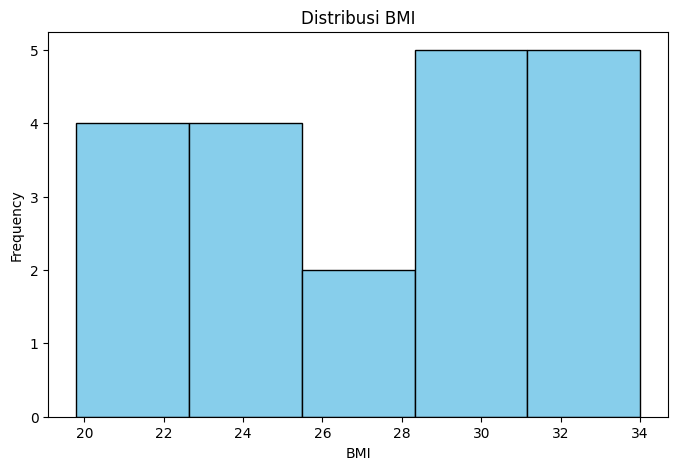

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['BMI'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribusi BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

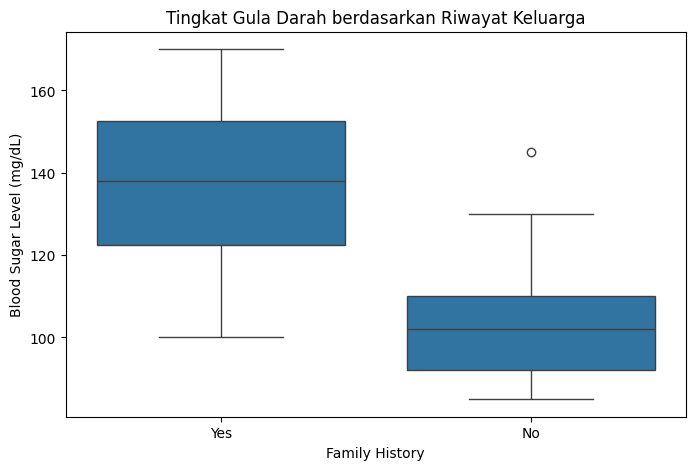

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Family_History', y='Blood_Sugar_Level', data=df)
plt.title("Tingkat Gula Darah berdasarkan Riwayat Keluarga")
plt.xlabel("Family History")
plt.ylabel("Blood Sugar Level (mg/dL)")
plt.show()

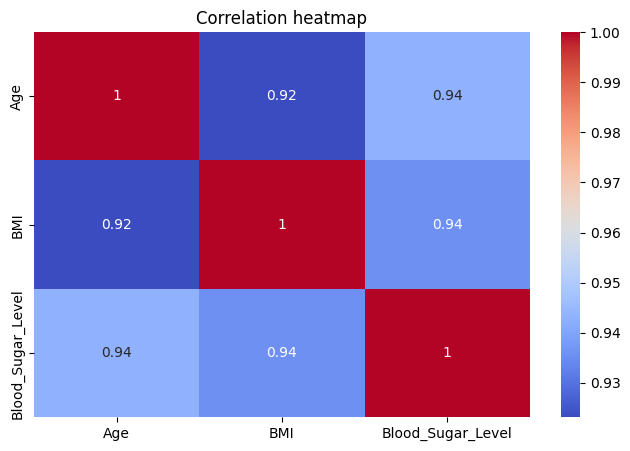

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age','BMI','Blood_Sugar_Level']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

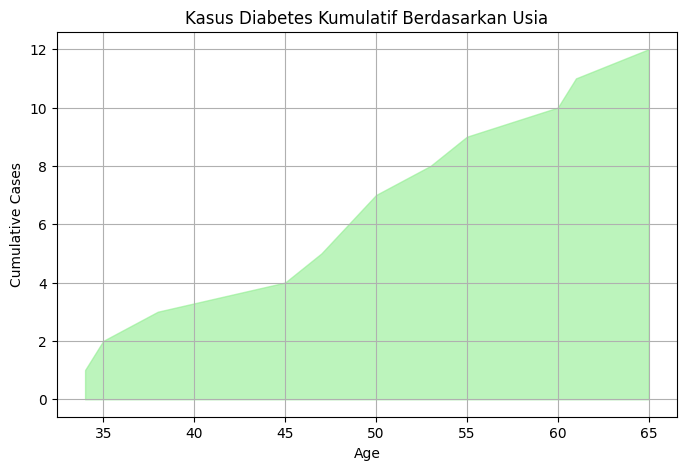

In [10]:
age_cum_cases = df[df['Diabetes'] == 'Yes'].groupby('Age').size().cumsum()
plt.figure(figsize=(8,5))
plt.fill_between(age_cum_cases.index, age_cum_cases.values,color='lightgreen',alpha=0.6)
plt.title("Kasus Diabetes Kumulatif Berdasarkan Usia")
plt.xlabel("Age")
plt.ylabel("Cumulative Cases")
plt.grid(True)
plt.show()

## Data Preprocessing

In [11]:
df_encoded = pd.DataFrame(df)

In [12]:
df_encoded['Family_History'] = df_encoded['Family_History'].map({'Yes' : 1 , 'No' : 0})
df_encoded['Diet'] = df_encoded['Diet'].map({'Poor' : 0, 'Moderate' : 1, 'Good' : 2})
df_encoded['Diabetes'] = df_encoded['Diabetes'].map({'Yes' : 1 , 'No' : 0})

In [13]:
df_encoded.head()

,Age,BMI,Blood_Sugar_Level,Family_History,Diet,Diabetes
0,45,28.7,135,1,0,1
1,50,31.2,145,0,1,1
2,30,22.0,95,0,2,0
3,35,25.4,105,1,0,1
4,60,33.5,155,1,0,1


In [14]:
categorical_df = df_encoded.copy()
categorical_df['Age'] = pd.cut(categorical_df['Age'], bins=[0,30,40,50,60,80],labels=[0,1,2,3,4])
categorical_df['BMI'] = pd.cut(categorical_df['BMI'], bins=[0,18.5,24.9,29.9,50],labels=[0,1,2,3])
categorical_df['Blood_Sugar_Level'] = pd.cut(categorical_df['Blood_Sugar_Level'], bins=[0,100,125,150,200],labels=[0,1,2,3])

In [15]:
categorical_df.head()

,Age,BMI,Blood_Sugar_Level,Family_History,Diet,Diabetes
0,2,2,2,1,0,1
1,2,3,2,0,1,1
2,0,1,0,0,2,0
3,1,2,1,1,0,1
4,3,3,3,1,0,1


## Tentukan X dan Y

In [16]:
x_categorical = categorical_df[['Age','BMI','Blood_Sugar_Level','Family_History','Diet']]
y_categorical = categorical_df['Diabetes']

## Split Data Train Dan Test

In [17]:
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(x_categorical,y_categorical,test_size=0.3, random_state=42)

## Masukan Algoritma

In [18]:
cat_nb_model = CategoricalNB()
cat_nb_model.fit(x_train_cat,y_train_cat)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


## testing Akurasi

In [19]:
y_pred_cat = cat_nb_model.predict(x_test_cat)

## Simulasi Dengan data baru

In [20]:
new_data_categorical = np.array([[3,2,1,1,0]])
new_prediction_cat = cat_nb_model.predict(new_data_categorical)

c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [21]:
(new_prediction_cat)

array([1])

In [22]:
if(new_prediction_cat[0]==0):
    print("pasien tidak terkena diabetes")
else:
    print("Pasien Terkena Diabetes")

Pasien Terkena Diabetes


In [23]:
cat_accuracy = accuracy_score(y_test_cat,y_pred_cat)

In [24]:
cat_conf_matrix = confusion_matrix(y_test_cat,y_pred_cat)

In [25]:
(cat_accuracy,cat_conf_matrix)

(0.8333333333333334,
 array([[2, 0],
        [1, 3]]))

In [26]:
import pickle
filename = 'cat_diabetes_mod.pkl'
pickle.dump(cat_nb_model, open(filename, 'wb'))